In [40]:
from matplotlib import pyplot as plt
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [41]:
import os
from matplotlib import pyplot as plt
import cv2
import math


# os.system("screencapture temp/screen.png")
img = cv2.imread("/Users/sagewong/git/Block-Blast-Data-Analyst/temp/screen.png", 1)
imgBoard = img[360:1190, 173:1000]
imgBoard = cv2.cvtColor(imgBoard, cv2.COLOR_BGR2GRAY)

import numpy as np
rows, cols = imgBoard.shape
# print(f"rows: {rows}, columns: {cols}")
x = np.zeros(rows*cols)
for i in range(rows):
        for j in range(cols):
            x[i + j*rows] = imgBoard[i, j]
            if imgBoard[i, j] < 35:
                imgBoard[i, j] = 0
            else:
                imgBoard[i, j] = 255
corners = []
distances = []
for i in range(25, rows-50):
    for j in range(25, cols-50):
        passesTest = True
        for z in range(50):
            if imgBoard[i-25 + z, j] == 255:
                passesTest = False
                break
        for z in range(50):
            if imgBoard[i, j-25+z] == 255:
                passesTest = False
                break
        if passesTest:
            if len(corners) > 0:
                passesSecondTest = True
                for corner in corners:
                    if math.sqrt((corner[0] - i)**2 + (corner[1] - j)**2) < 25:
                        passesSecondTest = False
                        break
                if passesSecondTest:
                    distances.append(math.sqrt((corners[0][0] - i)**2 + (corners[0][1] - j)**2))
                    corners.append([i, j])
            else:
                corners.append([i, j])

# for i in corners:
#     imgBoard[i[0], i[1]] = 255

# print(corners)

def duplicateRow(input, axis, direction, distance):
    smallestX = 10000
    for i in input:
        if i[0] < smallestX:
            smallestX = i[0]
    smallestY = 10000
    for i in input:
        if i[1] < smallestY:
            smallestY = i[1]
    largestX = 0
    for i in input:
        if i[0] > largestX:
            largestX = i[0]
    largestY = 0
    for i in input:
        if i[1] > largestY:
            largestY = i[1]
    # print(f"smallestX: {smallestX} smallestY: {smallestY} largestX: {largestX} largestY: {largestY}")
    littleDudes = []
    if axis == "x" and direction == 1:
        for i in input:
            if abs(i[0] - largestX) < 5:
                littleDudes.append([i[0] + distance, i[1]])
    if axis == "x" and direction == -1:
        for i in input:
            if abs(i[0] - smallestX) < 5:
                littleDudes.append([i[0] - distance, i[1]])
    if axis == "y" and direction == 1:
        for i in input:
            if abs(i[1] - largestY) < 5:
                littleDudes.append([i[0], i[1] + distance])
    if axis == "y" and direction == -1:
        for i in input:
            if abs(i[1] - smallestY) < 5:
                littleDudes.append([i[0], i[1] - distance])
    for i in littleDudes:
        input.append(i)
    return input
# print(corners)
output = []
output = duplicateRow(corners.copy(), "y", -1, min(distances))
output = duplicateRow(output.copy(), "y", 1, min(distances))
output = duplicateRow(output.copy(), "x", 1, min(distances))
output = duplicateRow(output.copy(), "x", -1, min(distances))

# print(output)
# for i in output:
    # imgBoard[int(i[1]), int(i[0])] = 255

a = np.array(output)
sorted_indices = np.lexsort((a[:,1], a[:,0]))
sorted_points = a[sorted_indices]
# sorted_points = np.reshape(sorted_points, (2, -1))
sorted_points = sorted_points.reshape(-1, 9, 2)
finalCornerCoords = []
for group in range(sorted_points.shape[0]):
    for row in range(sorted_points[group].shape[0]):
        try:
            finalCornerCoords.append([sorted_points[group][row], sorted_points[group][row+1], sorted_points[group+1][row], sorted_points[group+1][row+1]])
        except:
            pass
print(finalCornerCoords)

[[array([24., 24.]), array([ 24., 121.]), array([121.,  24.]), array([121., 121.])], [array([ 24., 121.]), array([ 24., 218.]), array([121., 121.]), array([121., 218.])], [array([ 24., 218.]), array([ 24., 315.]), array([121., 218.]), array([121., 315.])], [array([ 24., 315.]), array([ 24., 413.]), array([121., 315.]), array([121., 413.])], [array([ 24., 413.]), array([ 24., 510.]), array([121., 413.]), array([121., 510.])], [array([ 24., 510.]), array([ 24., 607.]), array([121., 510.]), array([121., 607.])], [array([ 24., 607.]), array([ 24., 704.]), array([121., 607.]), array([121., 704.])], [array([ 24., 704.]), array([ 24., 801.]), array([121., 704.]), array([121., 801.])], [array([121.,  24.]), array([121., 121.]), array([218.,  24.]), array([218., 121.])], [array([121., 121.]), array([121., 218.]), array([218., 121.]), array([218., 218.])], [array([121., 218.]), array([121., 315.]), array([218., 218.]), array([218., 315.])], [array([121., 315.]), array([121., 413.]), array([218.,

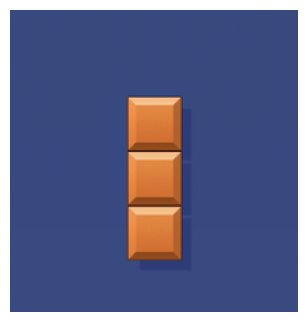

Maximum x found: 99
Maximum y found: 162


In [42]:
os.system("screencapture temp/screen2.png")
screenCoord = [1258, 1500, 215, 445]
newImg = cv2.imread("temp/screen2.png")
newImg = newImg[screenCoord[0]:screenCoord[1], screenCoord[2]:screenCoord[3]]

# for row in range(newImg.shape[0]):
#     for col in range(newImg.shape[1]):
#         if row <= screenCoord[0] or row >= screenCoord[1]:
#             newImg[row][col] = 0
#         if col <= 215 or col >= 445:
#             newImg[row][col] = 0
cv2.imwrite("hi.png", newImg)
display("hi.png")
rows, cols, _ = newImg.shape
cv2.imwrite(f"temp/imgBoard1000.png", imgBoard)
for i in range(rows):
    for j in range(cols):
        if np.linalg.norm(newImg[i, j]-[128,73,56]) < 10 or np.linalg.norm(newImg[i, j]-[119,60,46]) < 10:
            newImg[i, j] = [0, 0, 0]
cv2.imwrite(f"temp/imgBoard1.png", newImg)

kernel = np.ones((5,5), np.uint8)
newImg = cv2.erode(newImg, kernel, iterations=2)
cv2.imwrite(f"temp/imgBoard2.png", newImg)
# display("temp/imgBoard2.png")
imgBoard2 = cv2.cvtColor(newImg, cv2.COLOR_BGR2GRAY)

ret,thresh1 = cv2.threshold(imgBoard2,80,255,cv2.THRESH_BINARY)
cv2.imwrite("temp/imgBoard3.png", thresh1)
# display("temp/imgBoard3.png")
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imgBoard, contours, -1, (0,255,0), 3)

cv2.imwrite("temp/imgBoard4.png", imgBoard)
# display("temp/imgBoard4.png")

simplifiedContours = [i[0][0] for i in contours]
minXDistance = 1000
for i in range(len(simplifiedContours)):
    for j in range(i + 1, len(simplifiedContours)):
        distanceFound = abs(simplifiedContours[i][0] - simplifiedContours[j][0])
        if distanceFound < minXDistance and distanceFound>5:
            minXDistance = distanceFound
minYDistance = 1000
# print(minXDistance)
for i in range(len(simplifiedContours)):
    for j in range(i + 1, len(simplifiedContours)):
        distanceFound = abs(simplifiedContours[i][1] - simplifiedContours[j][1])
        if distanceFound < minYDistance and distanceFound>5:
            minYDistance = distanceFound
# print(minYDistance)
distance = min(minXDistance, minYDistance)
minX = min([i[0][0][0] for i in contours])
# print("Minimum x found: " + str(minX))
maxX = max([i[0][0][0] for i in contours])
print("Maximum x found: " + str(maxX))
minY = min([i[0][0][1] for i in contours])
# print("Minimum y found: " + str(minY))
maxY = max([i[0][0][1] for i in contours])
print("Maximum y found: " + str(maxY))


In [43]:
import pyautogui
from multiprocess import Process, Queue

def move():
    newMinX = minX+screenCoord[2]
    newMinY = minY+screenCoord[0]

    Xx = 0
    Yy = 0

    cornerCoords = [201, 388]

    desiredPosition = [24+Yy*97 + cornerCoords[0], 24+Xx*97 + cornerCoords[1]]

    imgBoard = img[360:1190, 173:1000]

    pyautogui.moveTo(newMinX/2,newMinY/2)
    pyautogui.click()

    pyautogui.mouseDown()

    os.system("screencapture temp/firstImage.png")
    firstImg = cv2.imread("temp/firstImage.png")
    firstImg = firstImg[360:1190, 173:1000]

    pyautogui.mouseUp()

    pyautogui.dragTo(newMinX/2-50, newMinY/2-50, 1, button="left")

    pyautogui.mouseUp()
    print("hi")


def screenie():
    os.system("screencapture temp/secondImage.png")
    secondImg = cv2.imread("temp/secondImage.png")
    secondImg = secondImg[360:1190, 173:1000]
if __name__ == "__main__":
    q = Queue()
    p1 = Process(target=move,args=[])
    p2 = Process(target=screenie,args=[])
    p1.start()
    p1.join()


In [9]:
import cv2
import numpy as np

image1 = cv2.imread("/Users/sagewong/git/Block-Blast-Data-Analyst/Screenshot 2025-04-16 at 8.47.53 PM.png")
image2 = cv2.imread("/Users/sagewong/git/Block-Blast-Data-Analyst/Screenshot 2025-04-16 at 8.47.54 PM.png")

image1 = image1[360:1190, 173:1000]
image2 = image2[360:1190, 173:1000]

cv2.imwrite("image1.png", image1)
cv2.imwrite("image2.png", image2)

def compareTwoImages(im1, im2):
    for row in range(im1.shape[0]):
        for col in range(im2.shape[1]):
            if not np.array_equal(im1[row][col], im2[row][col]):
                print(row)
                print(col)
                print("---")

compareTwoImages(image1, image2)

596
336
---
596
337
---
596
338
---
596
339
---
596
341
---
596
342
---
596
343
---
596
344
---
596
345
---
596
347
---
596
348
---
596
349
---
596
350
---
596
351
---
596
352
---
596
353
---
596
354
---
596
355
---
596
356
---
596
357
---
596
358
---
596
359
---
596
360
---
596
361
---
596
362
---
596
363
---
596
364
---
596
365
---
596
366
---
596
367
---
596
368
---
596
369
---
596
370
---
596
371
---
596
372
---
596
373
---
596
374
---
596
375
---
596
376
---
596
377
---
596
378
---
596
379
---
596
380
---
596
381
---
596
382
---
596
383
---
596
384
---
596
385
---
596
386
---
596
387
---
596
388
---
596
390
---
596
391
---
596
393
---
596
394
---
596
396
---
596
397
---
596
398
---
596
399
---
596
400
---
596
401
---
596
402
---
596
403
---
596
404
---
596
405
---
596
406
---
596
407
---
596
408
---
596
409
---
596
410
---
596
411
---
596
412
---
596
413
---
596
414
---
596
415
---
596
416
---
596
417
---
596
418
---
596
419
---
596
420
---
596
421
---
596
422
---
596
423
---
596
